In [78]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

In [79]:
secret_num = '101001110'

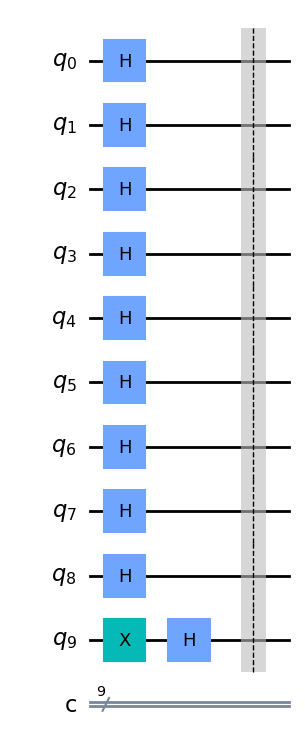

In [80]:
circuit = QuantumCircuit(len(secret_num)+1, len(secret_num))
circuit.x(len(secret_num))
circuit.h(range(len(secret_num) + 1))
circuit.barrier()
circuit.draw('mpl')

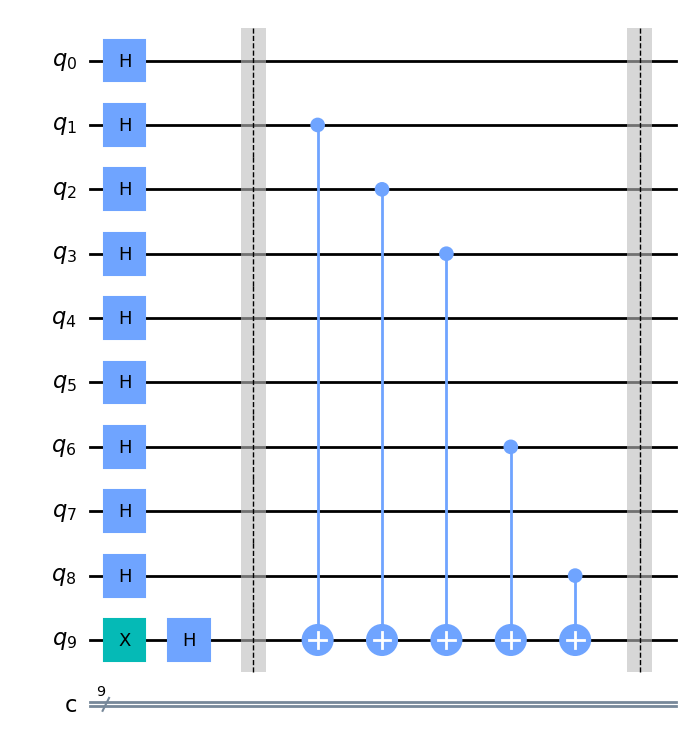

In [81]:
for index, yes_no in enumerate(reversed(secret_num)):
    if yes_no == '1':
        circuit.cx(index, len(secret_num))
        
circuit.barrier()
circuit.draw('mpl')

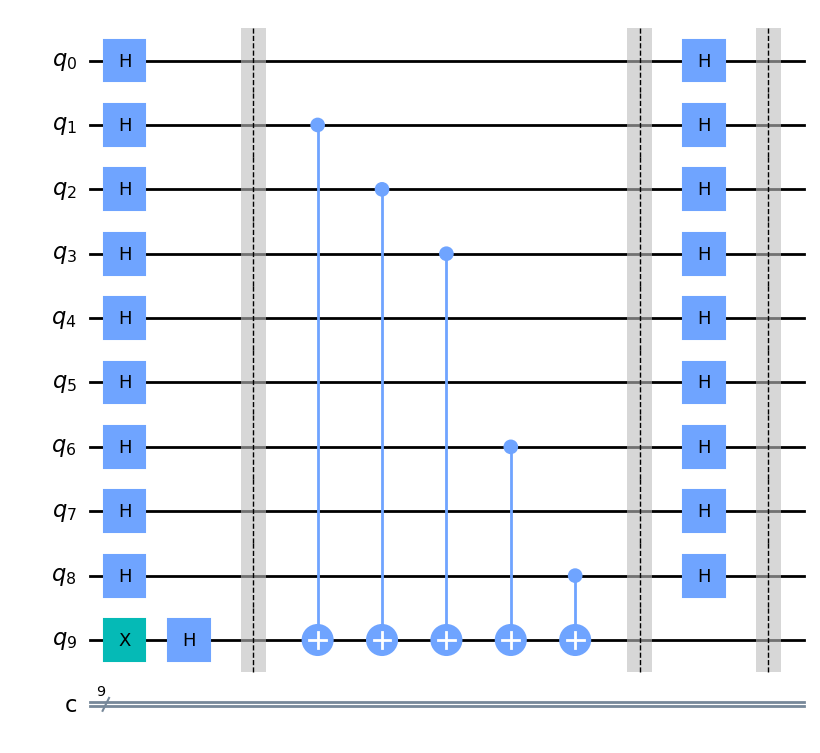

In [82]:
circuit.h(range(len(secret_num)))
circuit.barrier()
circuit.draw('mpl')

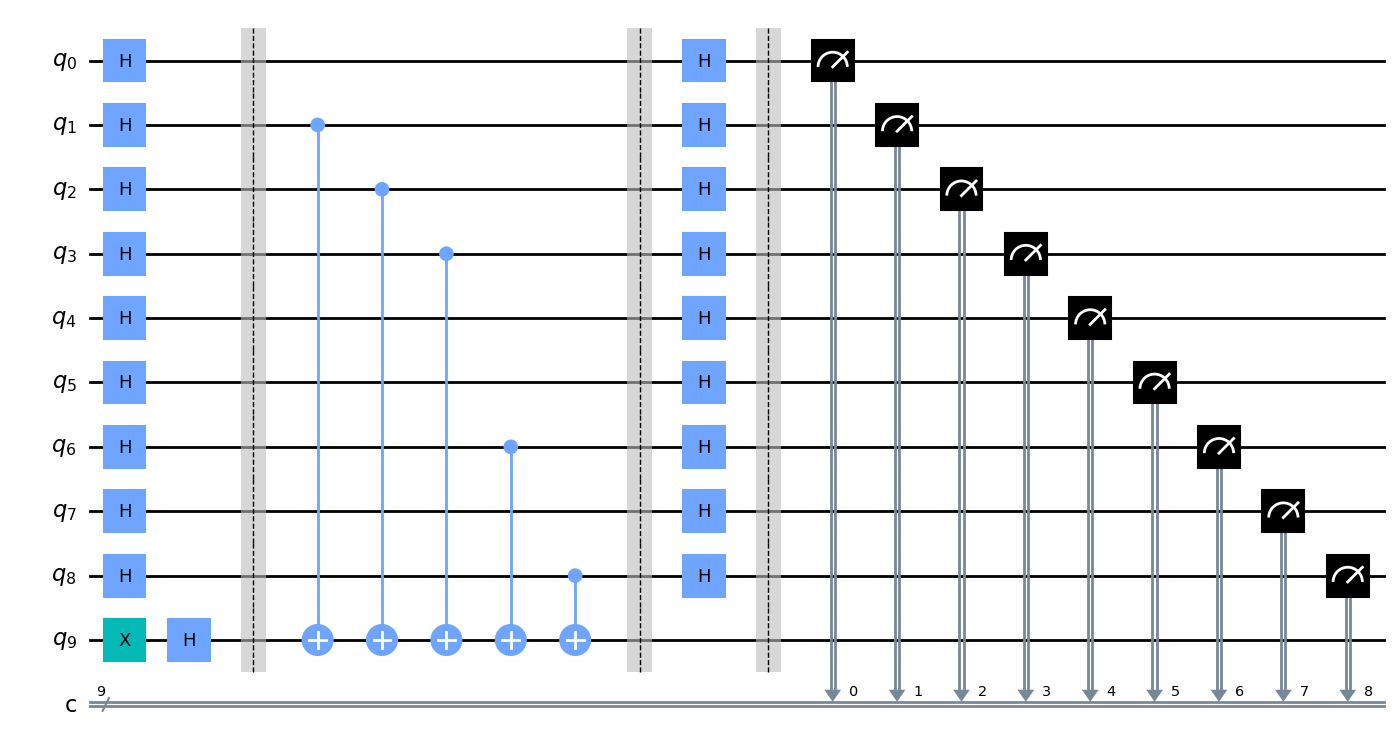

In [83]:
circuit.measure(range(len(secret_num)), range(len(secret_num)))
circuit.draw('mpl')

In [86]:
simulator = Aer.get_backend('qasm_simulator')
results = execute(circuit, backend=simulator, shots=1).result()
print(results.get_counts())
print(f'Secret number found: {list(results.get_counts().keys())[0] == secret_num}')

{'101001110': 1}
Secret number found: True
